# Logistic Regression

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight

In [36]:
# Load the data
df = pd.read_csv("/content/top15_rf_features_dataset.csv")

# Feature Selection
X = df.drop(['subject_id', 'hospital_expired'], axis=1)
y = df['hospital_expired']

# Split the data into train and test sets (80-20 split), set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance by using class weights in Logistic Regression
# Convert classes to a numpy array
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert class_weights to a dictionary
class_weight_dict = dict(zip([0, 1], class_weights))

# Set up the Logistic Regression model
log_reg_model = LogisticRegression(class_weight=class_weight_dict, max_iter=1000)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found by GridSearch: {grid_search.best_params_}")

# Train the best model from GridSearch
best_log_reg_model = grid_search.best_estimator_

# Make predictions
y_pred = best_log_reg_model.predict(X_test_scaled)

Best parameters found by GridSearch: {'C': 1}


In [37]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, best_log_reg_model.predict_proba(X_test_scaled)[:, 1]))

# Cross-validation performance
cv_scores = cross_val_score(best_log_reg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean Cross-Validation accuracy:", cv_scores.mean())

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      6590
           1       0.26      0.80      0.39       738

    accuracy                           0.75      7328
   macro avg       0.61      0.77      0.62      7328
weighted avg       0.90      0.75      0.80      7328

Confusion Matrix:
 [[4888 1702]
 [ 147  591]]
AUC-ROC Score: 0.8450269563393661
Cross-Validation accuracy Scores: [0.7517912  0.75759127 0.73984988 0.74769703 0.74270602]
Mean Cross-Validation accuracy: 0.7479270797005413


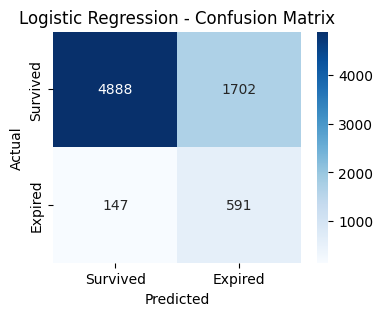

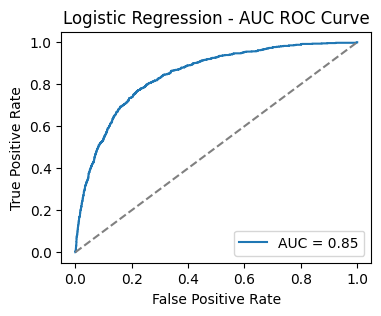

In [38]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Expired'], yticklabels=['Survived', 'Expired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Plot AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_log_reg_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, best_log_reg_model.predict_proba(X_test_scaled)[:, 1]):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - AUC ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

In [ ]:
# Load dataset
df = pd.read_csv("/content/top15_rf_features_dataset.csv")

# Prepare data
X = df.drop(columns=["subject_id", "hospital_expired"])
y = df["hospital_expired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest with GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5]
}
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found by GridSearch: {grid_rf.best_params_}")

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

Best parameters found by GridSearch: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Evaluate the model
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_rf))

# Cross-validation performance
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Mean Cross-Validation Accuracy:", cv_scores_rf.mean())

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6596
           1       0.69      0.45      0.54       732

    accuracy                           0.92      7328
   macro avg       0.81      0.71      0.75      7328
weighted avg       0.92      0.92      0.92      7328

Confusion Matrix:
 [[6445  151]
 [ 403  329]]
AUC-ROC Score: 0.8864277944573131
Cross-Validation Accuracy Scores: [0.92852269 0.92238144 0.92562265 0.930058   0.92646306]
Mean Cross-Validation Accuracy: 0.9266095688522998


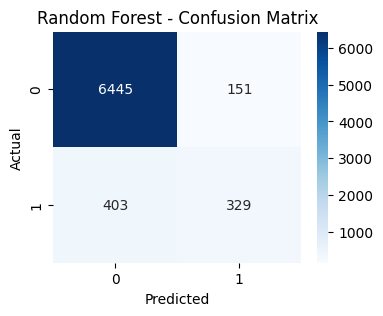

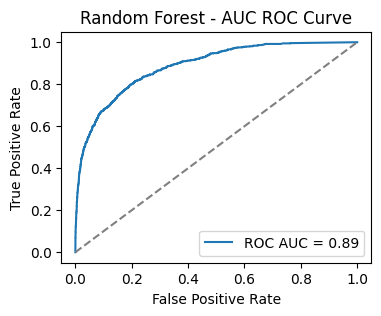

In [ ]:
# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_prob_rf):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - AUC ROC Curve")
plt.legend()
plt.show()

# XGBoost

In [22]:
! pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [42]:
# Load and prepare data
df = pd.read_csv("/content/top15_rf_features_dataset.csv")
X = df.drop(columns=["subject_id", "hospital_expired"])
y = df["hospital_expired"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Define XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight_dict.get(1, 1),
                              use_label_encoder=False,
                              eval_metric='logloss')

# Grid search parameters for XGBoost
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 10],
    "n_estimators": [50, 100, 200]
}

# Grid search
grid = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters found by GridSearch: {grid.best_params_}")

# Predictions
y_pred_prob = grid.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:21:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found by GridSearch: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}


In [43]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))

# Cross-validation performance
cv_scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation accuracy Scores:", cv_scores)
print("Mean Cross-Validation accuracy:", cv_scores.mean())

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6596
           1       0.67      0.49      0.57       732

    accuracy                           0.93      7328
   macro avg       0.81      0.73      0.76      7328
weighted avg       0.92      0.93      0.92      7328

Confusion Matrix:
 [[6419  177]
 [ 371  361]]
AUC-ROC Score: 0.8780441532705697


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation accuracy Scores: [0.92903446 0.92698738 0.92766974 0.92818151 0.92356253]
Mean Cross-Validation accuracy: 0.9270871225701806


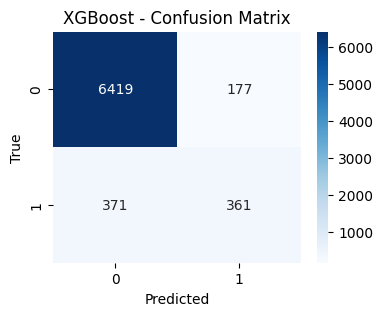

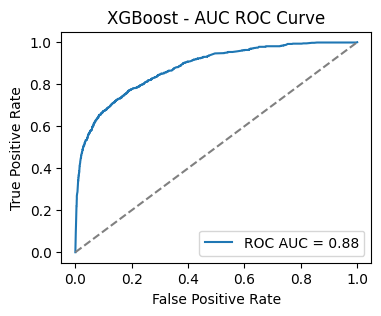

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - AUC ROC Curve')
plt.legend(loc='lower right')
plt.show()